In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

In [ ]:
# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Get GPU details
if tf.config.list_physical_devices('GPU'):
    print("GPU is available!")
    print(tf.config.list_physical_devices('GPU'))
else:
    print("No GPU available, using CPU")

Num GPUs Available:  1
GPU is available!
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# Load your data
# Upload your .npy files to Colab first, then load them
data = np.load('/content/data_out_pt1.npz')  # Shape: (20000, 32, 32, 3)

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to categorical (one-hot encoding)
num_classes = 10
y_train_cat = keras.utils.to_categorical(y_train[:,1], num_classes)

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")



Training data shape: (20000, 28, 28)
Training labels shape: (20000, 2)
Test data shape: (3000, 28, 28)


In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape to (28, 28, 1) if needed
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

num_classes = 10
y_train_cat = keras.utils.to_categorical(y_train, num_classes)

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train_cat.shape}")
print(f"Test data shape: {x_test.shape}")


Training data shape: (60000, 28, 28, 1)
Training labels shape: (60000, 10)
Test data shape: (10000, 28, 28, 1)


In [ ]:
# ===== SPLIT INTO TRAIN AND VALIDATION SETS =====
from sklearn.model_selection import train_test_split
# Split training data: 80% train, 20% validation
X_train, X_val, y_train, y_val = train_test_split(
    x_train, y_train_cat,
    test_size=0.2,
    random_state=42
)

print(y_train.shape)
print(x_train.shape)
print(x_test.shape)

(48000, 10)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# State of the Art Model
# Load required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define CNN model
cnn_model = keras.Sequential()

# Add layers one by one
cnn_model.add(layers.Conv2D(
    filters=32,
    kernel_size=3,
    activation='relu',
    input_shape=(28, 28, 1)
))

cnn_model.add(layers.MaxPooling2D(pool_size=2))

cnn_model.add(layers.Conv2D(
    filters=64,
    kernel_size=3,
    activation='relu'
))

cnn_model.add(layers.MaxPooling2D(pool_size=2))
cnn_model.add(layers.Dropout(rate=0.25))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(units=128, activation='relu'))
cnn_model.add(layers.Dropout(rate=0.5))
cnn_model.add(layers.Dense(units=10, activation='softmax'))



In [ ]:
# State of the Art Model (best model)
# Load required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define CNN model
cnn_model = keras.Sequential()

# Add layers one by one
cnn_model.add(layers.Conv2D(
    filters=32,
    kernel_size=3,
    activation='relu',
    input_shape=(28, 28, 1)
))

cnn_model.add(layers.MaxPooling2D(pool_size=2))
cnn_model.add(layers.Conv2D(
    filters=64,
    kernel_size=3,
    activation='relu'
))
cnn_model.add(layers.Dropout(rate=0.5))
cnn_model.add(layers.BatchNormalization())


cnn_model.add(layers.Conv2D(
    filters=96,
    kernel_size=3,
    activation='relu'
))
cnn_model.add(layers.Dropout(rate=0.5))
cnn_model.add(layers.BatchNormalization())

cnn_model.add(layers.Conv2D(
    filters=96,
    kernel_size=3,
    activation='relu'
))
cnn_model.add(layers.Dropout(rate=0.5))

cnn_model.add(layers.MaxPooling2D(pool_size=2))
cnn_model.add(layers.Dropout(rate=0.5))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(units=128, activation='relu'))
cnn_model.add(layers.Dropout(rate=0.5))
cnn_model.add(layers.Dense(units=10, activation='softmax'))

In [ ]:
# State of the Art Model
# Load required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define CNN model
cnn_model = keras.Sequential()

# Add layers one by one
cnn_model.add(layers.Conv2D(
    filters=32,
    kernel_size=3,
    activation='relu',
    input_shape=(28, 28, 1)
))
cnn_model.add(layers.Dropout(rate=0.25))

cnn_model.add(layers.MaxPooling2D(pool_size=2))

cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Conv2D(
    filters=64,
    kernel_size=5,
    activation='relu'
))

cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Conv2D(
    filters=96,
    kernel_size=5,
    activation='relu'
))
cnn_model.add(layers.Dropout(rate=0.5))

cnn_model.add(layers.MaxPooling2D(pool_size=2))
cnn_model.add(layers.Dropout(rate=0.5))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(units=256, activation='relu'))
cnn_model.add(layers.Dropout(rate=0.5))
cnn_model.add(layers.Dense(units=10, activation='softmax'))



In [ ]:
cnn_model.summary()

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_130 (Conv2D)             │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_88 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_131 (Conv2D)             │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_126 (Dropout)           │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_132 (Conv2D)             │ (None, 9, 9, 96)       │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_127 (Dropout)           │ (None, 9, 9, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 9, 9, 96)       │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_133 (Conv2D)             │ (None, 7, 7, 96)       │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_128 (Dropout)           │ (None, 7, 7, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_89 (MaxPooling2D) │ (None, 3, 3, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_129 (Dropout)           │ (None, 3, 3, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_43 (Flatten)            │ (None, 864)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 128)            │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_130 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,898 (1.03 MB)

 Trainable params: 269,578 (1.03 MB)

 Non-trainable params: 320 (1.25 KB)

In [ ]:
from functools import reduce
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

early_stopping = [keras.callbacks.EarlyStopping(
    patience=20,
    restore_best_weights=True,
),
ReduceLROnPlateau(
    factor=0.5,
    patience=3,
    min_lr=1e-6
)]

In [ ]:
## Fitting the model
r = cnn_model.fit(X_train, y_train,
              batch_size=64,
              epochs=150,
              validation_data=(X_val, y_val),
              verbose = 1,
              callbacks=early_stopping
             )

Epoch 1/150
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.4774 - loss: 1.7812 - val_accuracy: 0.9507 - val_loss: 0.2185 - learning_rate: 0.0010
Epoch 2/150
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9073 - loss: 0.3117 - val_accuracy: 0.9718 - val_loss: 0.1026 - learning_rate: 0.0010
Epoch 3/150
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9433 - loss: 0.1940 - val_accuracy: 0.9810 - val_loss: 0.0688 - learning_rate: 0.0010
Epoch 4/150
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9528 - loss: 0.1655 - val_accuracy: 0.9817 - val_loss: 0.0721 - learning_rate: 0.0010
Epoch 5/150
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9613 - loss: 0.1406 - val_accuracy: 0.9827 - val_loss: 0.0601 - learning_rate: 0.0010
Epoch 6/150
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9636 - loss: 0.1268 - val_accuracy: 0.9854 - val_loss: 0.0458 - learning_rate: 0.0010
Epoch 7/150
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9672 - loss: 0

In [ ]:
# Evaluate on training set
train_loss, train_accuracy = cnn_model.evaluate(X_train, y_train)
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate on test set
test_loss, test_accuracy = cnn_model.evaluate(X_val, y_val)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9981 - loss: 0.0081
Training Loss: 0.0082
Training Accuracy: 0.9981
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9936 - loss: 0.0211
Test Loss: 0.0214
Test Accuracy: 0.9938


Text(0.5, 1.0, 'Accuracy evolution')

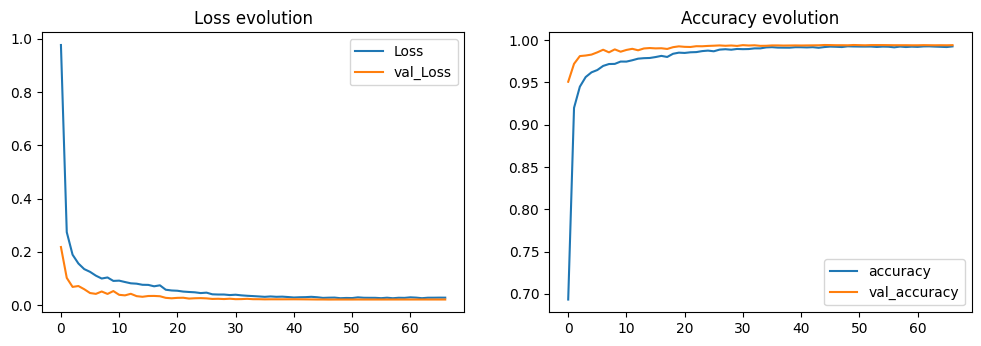

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [ ]:
# Make predictions on test set
predictions = cnn_model.predict(x_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


In [ ]:
# Create ID column
ids = np.arange(20001, 20001 + len(predictions)).reshape(-1, 1)

# Concatenate ID column with predictions
results = np.concatenate([ids, predictions], axis=1)

# Convert to DataFrame with column names
column_names = ['ID'] + [f'Class{i}' for i in range(predictions.shape[1])]
results_df = pd.DataFrame(results, columns=column_names)



In [ ]:
# Save to CSV
# Convert ID column to integer type
results_df['ID'] = results_df['ID'].astype(int)
results_df.to_csv("CNN-submission-pt1.csv", index=False)

# Display first few predictions
print("\nFirst 10 predictions:")
print(results_df.head(10))

# Optional: Save the model
cnn_model.save('cnn_model.h5')
print("\nModel saved to 'cnn_model.h5'")


First 10 predictions:
      ID        Class0        Class1        Class2        Class3  \
0  20001  9.730886e-10  9.999995e-01  5.295725e-08  2.784243e-13   
1  20002  4.278643e-09  1.782360e-04  2.020742e-04  9.104425e-06   
2  20003  4.103742e-12  4.282956e-11  1.000000e+00  1.732302e-09   
3  20004  1.716978e-09  9.999975e-01  1.704321e-07  4.239227e-12   
4  20005  1.208404e-12  1.354867e-12  1.332150e-14  1.824139e-10   
5  20006  5.252865e-13  4.345549e-14  8.721491e-14  1.429559e-07   
6  20007  3.635966e-22  2.017270e-13  1.108117e-13  1.364091e-25   
7  20008  1.475621e-25  2.907715e-15  8.388175e-16  7.064070e-29   
8  20009  1.266754e-08  1.440423e-06  9.999962e-01  1.684293e-06   
9  20010  1.144726e-12  3.559908e-05  2.694204e-05  1.174607e-06   

         Class4        Class5        Class6        Class7        Class8  \
0  2.859977e-07  1.995511e-08  1.210511e-09  1.041826e-07  9.256564e-09   
1  1.961733e-05  1.177968e-07  1.480063e-19  9.994018e-01  8.973951e-09   
2  